In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [80]:
dataset=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [81]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [83]:
#missing values
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [84]:
dataset.loc[:122,"Region"]=0
dataset.loc[122:,"Region"]=1
df=dataset

In [85]:
df_copy['Classes'].value_counts()

Classes
1    243
Name: count, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [87]:
df[['Region']]=df[['Region']].astype(int)

In [88]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [89]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [90]:
#removing the null values
df=df.dropna().reset_index(drop=True)

In [91]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [92]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [93]:
#removing the 122nd row
df=df.drop(122).reset_index(drop=True)

In [94]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [95]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [96]:
#fix space in columns names
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [98]:
#change the required columns as integer data type
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [100]:
#changing the other columns to float datatype
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']]=df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [102]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


EDA and feature engineering

In [103]:
#save the cleaned dataset
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

Exploratory data analysis

In [104]:
df_copy=df.drop(['day','month','year'],axis=1)

In [105]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [106]:
#encoding of the categories of the class
df_copy['Classes']=np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [107]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [109]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [110]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

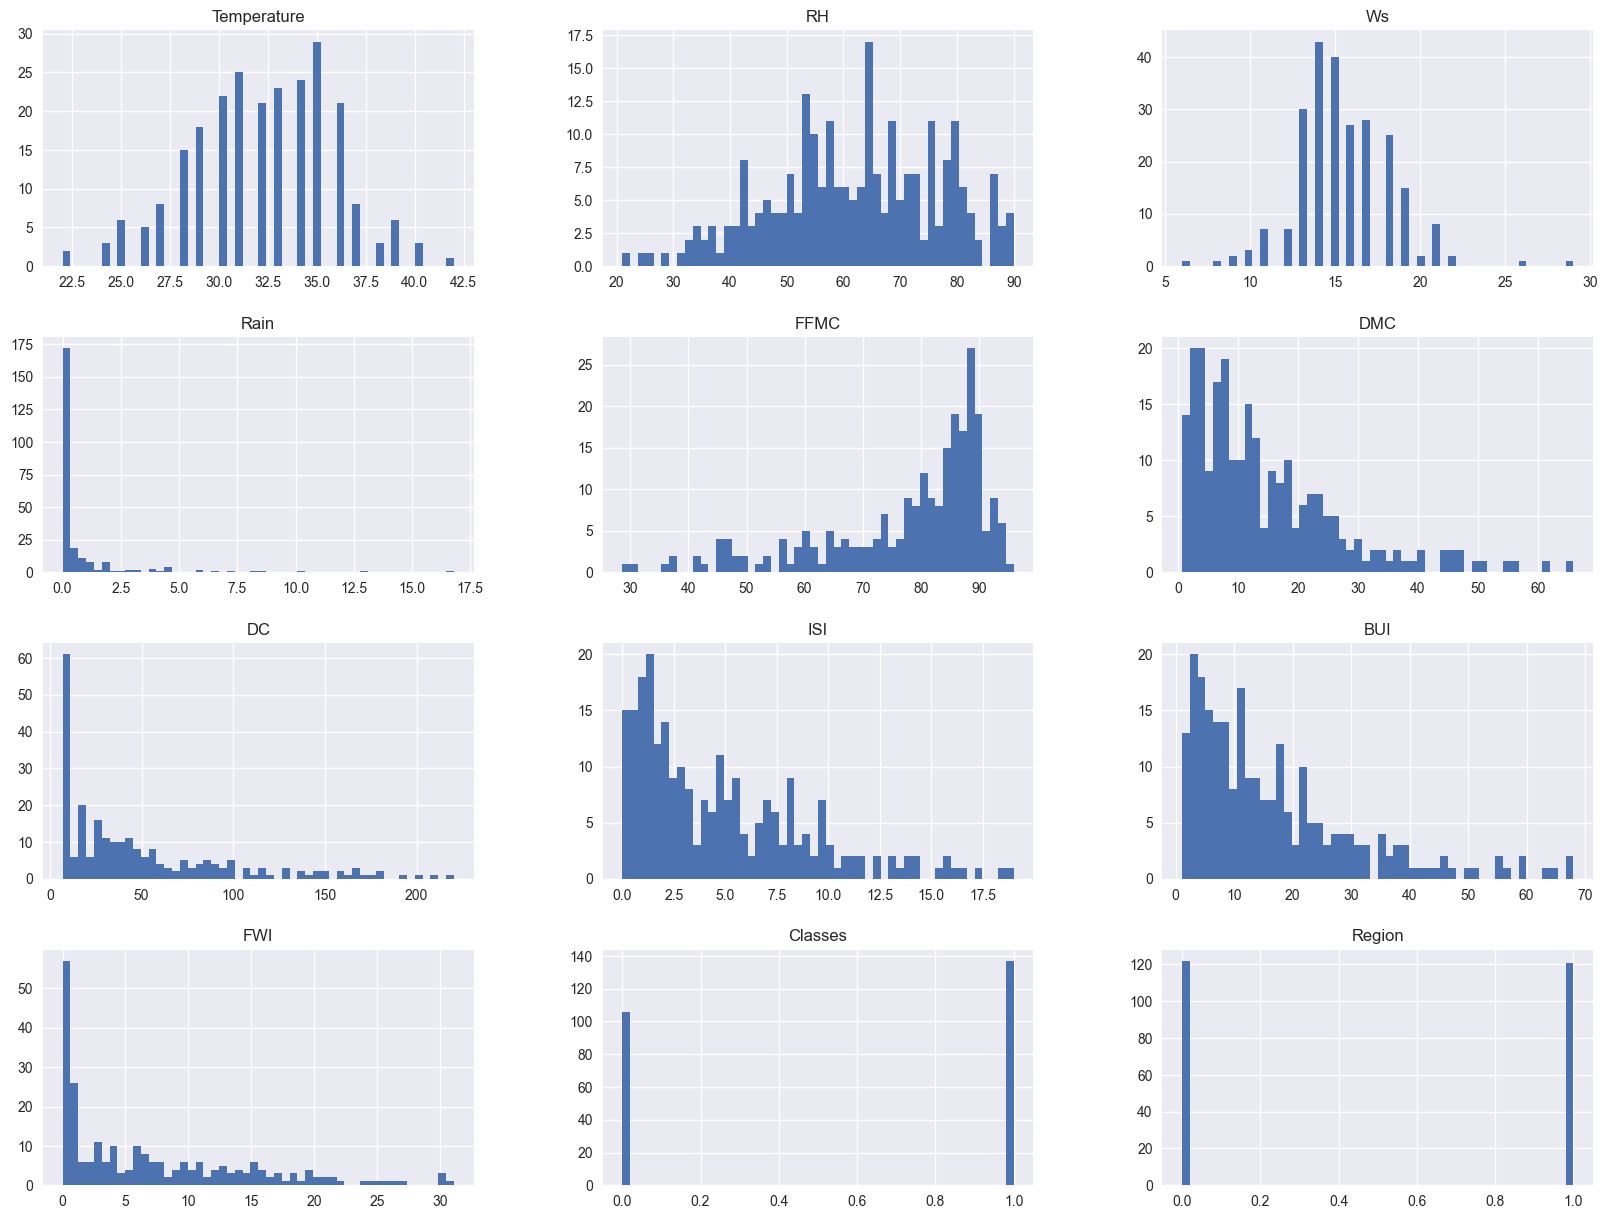

In [111]:
#plot density plot for all features
plt.style.use('seaborn-v0_8')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [112]:
#percentage for the pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

In [113]:
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

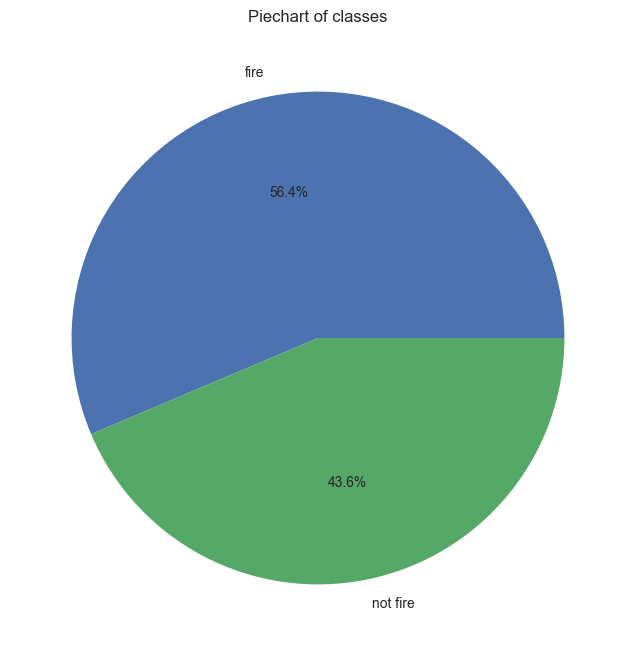

In [114]:
#plotting pie chart
classlabels=["fire","not fire"]
plt.figure(figsize=(12,8))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Piechart of classes')
plt.show()

In [115]:
#correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

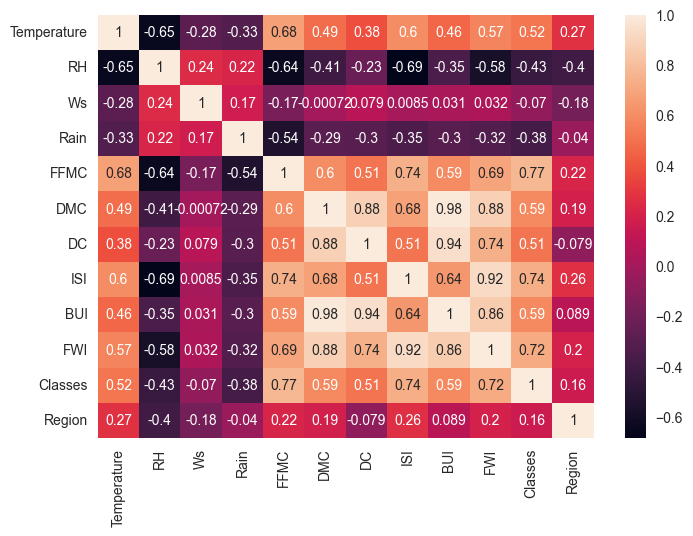

In [116]:
sns.heatmap(df_copy.corr(),annot=True)

<Axes: ylabel='FWI'>

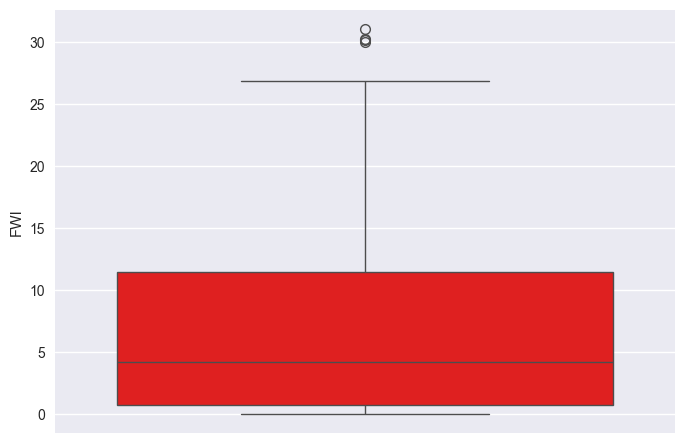

In [117]:
#box plot
sns.boxplot(df['FWI'],color='red')

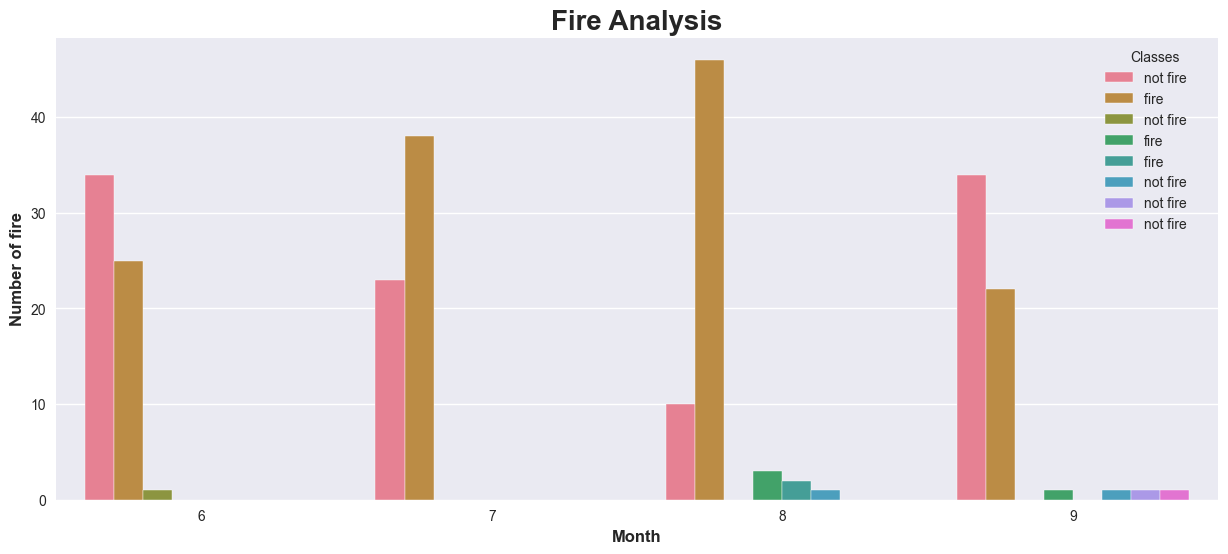

In [118]:
#monthly fire analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(15,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of fire',fontsize=12,weight='bold')
plt.xlabel('Month',fontsize=12,weight='bold')
plt.title('Fire Analysis',fontsize=20,weight='bold')
plt.show()

In [119]:
#feature sselection
#dependent and independent feature
X=df_copy.drop('FWI',axis=1)
y=df_copy['FWI']

In [120]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [121]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [122]:
X_train.shape,X_test.shape

((194, 11), (49, 11))

In [123]:
#feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.666832,-0.363524,-0.353372,0.684186,0.485272,0.344520,0.610784,0.447509,0.497727,0.316034
RH,-0.666832,1.000000,0.268542,0.252659,-0.639914,-0.400913,-0.206873,-0.700103,-0.340127,-0.431097,-0.442337
Ws,-0.363524,0.268542,1.000000,0.219551,-0.238520,-0.026332,0.057709,-0.025648,0.008292,-0.106459,-0.188898
Rain,-0.353372,0.252659,0.219551,1.000000,-0.588079,-0.300879,-0.306149,-0.351447,-0.310650,-0.377688,-0.076930
FFMC,0.684186,-0.639914,-0.238520,-0.588079,1.000000,0.610152,0.511148,0.736174,0.596990,0.765968,0.275874
DMC,0.485272,-0.400913,-0.026332,-0.300879,0.610152,1.000000,0.884202,0.673975,0.982542,0.592269,0.194039
DC,0.344520,-0.206873,0.057709,-0.306149,0.511148,0.884202,1.000000,0.489671,0.945585,0.513694,-0.060157
ISI,0.610784,-0.700103,-0.025648,-0.351447,0.736174,0.673975,0.489671,1.000000,0.632169,0.732387,0.313642
BUI,0.447509,-0.340127,0.008292,-0.310650,0.596990,0.982542,0.945585,0.632169,1.000000,0.593063,0.094501
Classes,0.497727,-0.431097,-0.106459,-0.377688,0.765968,0.592269,0.513694,0.732387,0.593063,1.000000,0.209882


<Axes: >

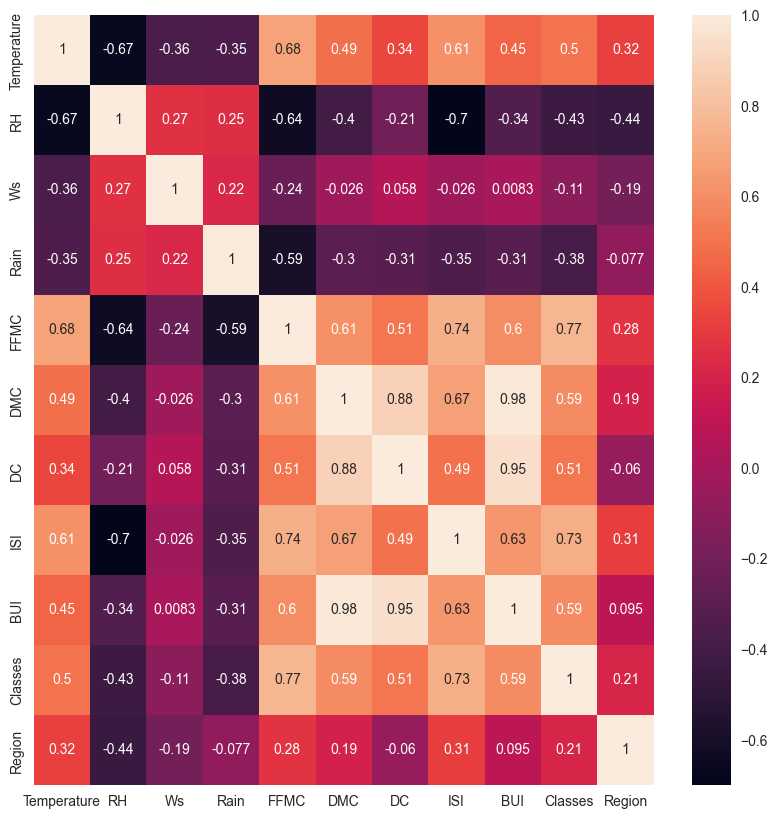

In [124]:
#check for multi collinearity
plt.figure(figsize=(10,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [125]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
              colname=corr_matrix.columns[i]
              col_corr.add(colname)

    return col_corr

In [126]:
#threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [127]:
#drop feature when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((194, 9), (49, 9))

In [128]:
#feature scaling or standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [129]:
X_train_scaled

array([[ 0.74605716, -0.35570689, -0.56597023, ..., -0.66996332,
        -1.15643824,  1.01036297],
       [ 0.47653185,  0.49381278, -0.91901919, ..., -0.23039678,
         0.86472409, -0.98974332],
       [ 0.47653185, -0.22501155,  0.84622559, ...,  0.69500645,
         0.86472409,  1.01036297],
       ...,
       [-0.33204406, -0.48640222, -1.6251171 , ..., -0.57742299,
        -1.15643824, -0.98974332],
       [-0.33204406,  0.42846512, -0.56597023, ..., -0.0915863 ,
         0.86472409, -0.98974332],
       [-0.06251876, -0.87848823,  0.84622559, ...,  1.89803064,
         0.86472409,  1.01036297]], shape=(194, 9))

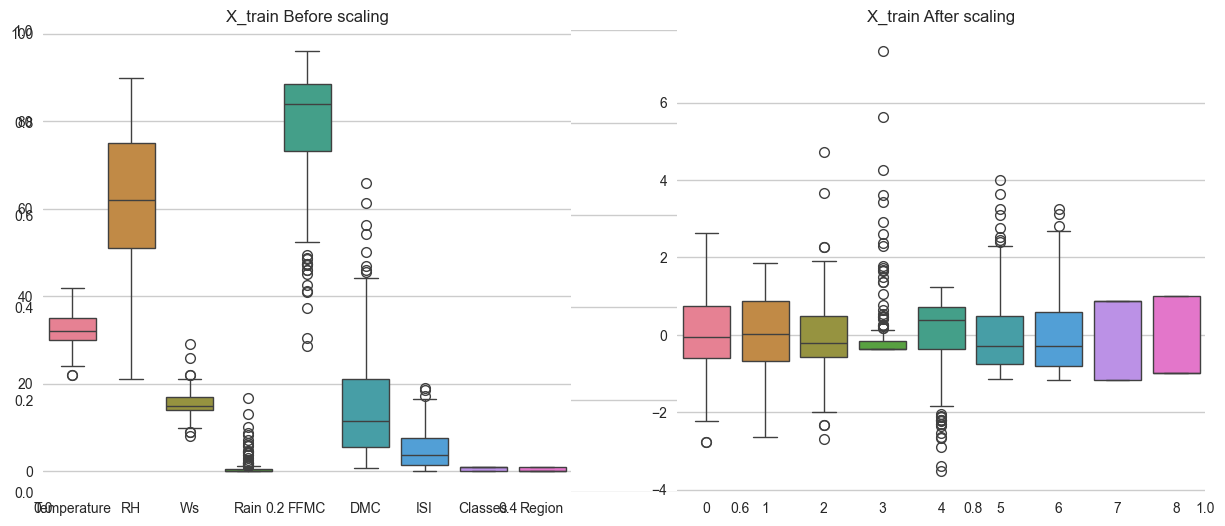

In [130]:
#box plot to understand effect of standard scaler
plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After scaling')
plt.show()

R2 score: 0.9773899683550065
Mean absolute error: 0.6700307048370675


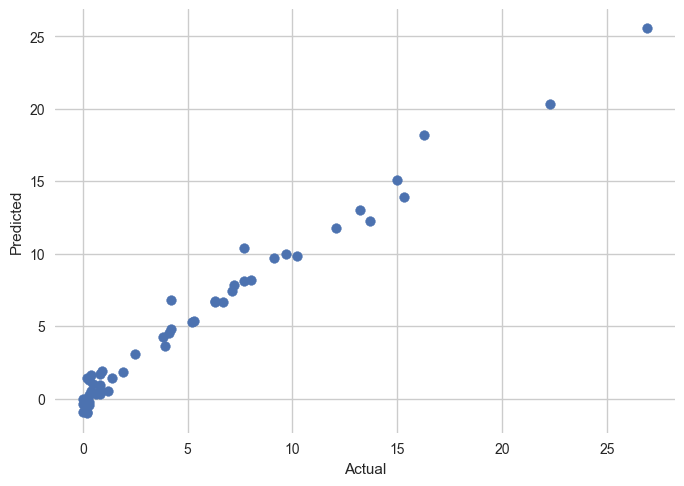

In [131]:
#model training(linear regression model )
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error
linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

R2 score: 0.9433416904087941
Mean absolute error: 1.1144861330607514


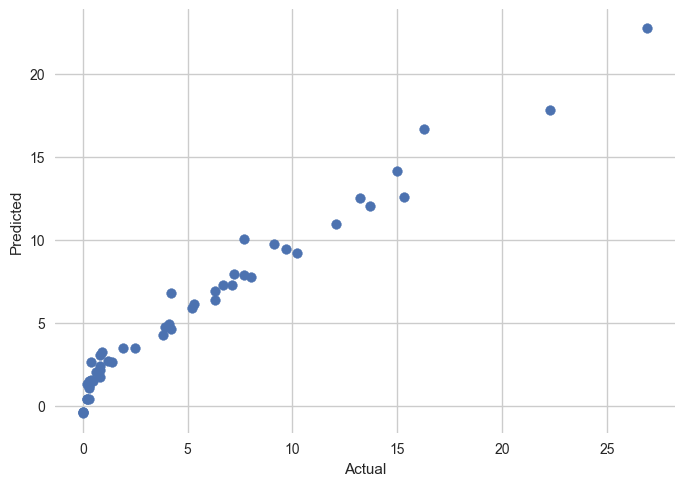

In [132]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

R2 score: 0.9766228010748003
Mean absolute error: 0.6905345455834931


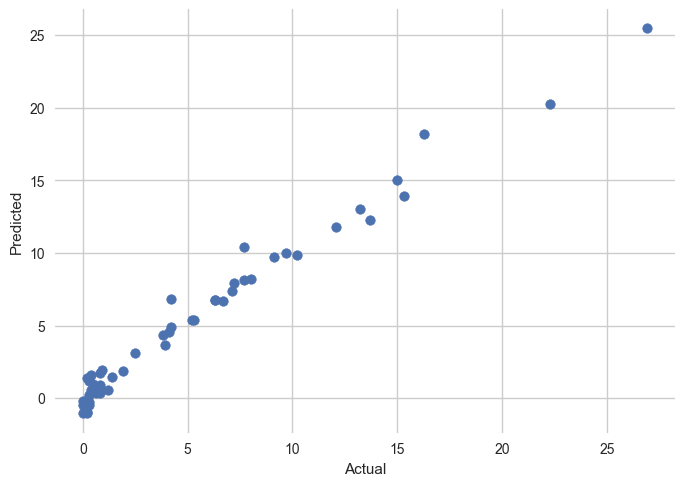

In [133]:
#ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

R2 score: 0.8777177823187075
Mean absolute error: 1.7415526320622194


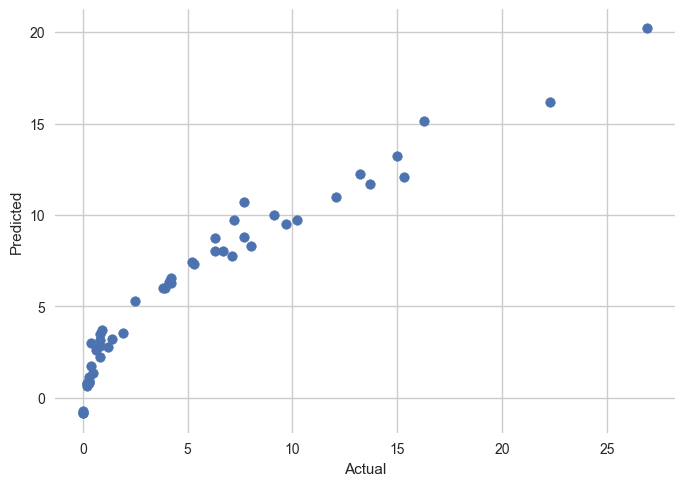

In [134]:
#elasticnet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

hyperparameter tuning

R2 score: 0.9433416904087941
Mean absolute error: 1.1144861330607514


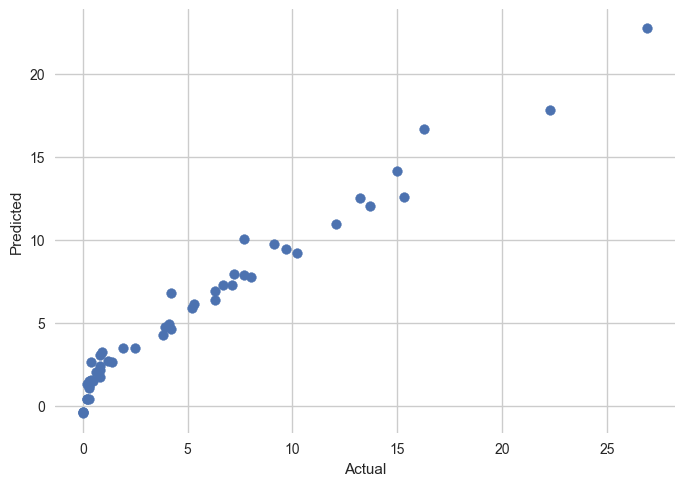

In [136]:
#lasso regression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_absolute_error
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [137]:
#cross validation lasso
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [138]:
lassocv.predict(X_test_scaled)

array([ 9.96986125,  7.68534449,  8.18867191,  6.58275555,  8.03895752,
       11.81728874, -1.02841212,  9.82635149,  5.27832273, 12.38600654,
        0.86706416, 13.04472879,  6.51976697, 15.04508371,  0.49978922,
        0.20164072,  1.73073809,  1.96892293,  3.76430388,  1.14191692,
       10.36150853,  5.49208784,  6.87732685, -0.89598193,  3.04974644,
        4.12394728,  9.7824687 , -0.22285454,  1.22176388,  1.46051298,
       13.87786511,  0.96279621, -0.43655509, 20.16376982,  4.5785938 ,
        1.04137323,  0.76484423, 18.20863802, 25.35236591,  1.90848235,
        6.81907595,  0.57528762, -0.6849141 ,  1.51745913,  0.46905828,
       -0.36321169,  4.63340904,  7.47761275, -1.18227536])

In [139]:
lassocv.alpha_

np.float64(0.0284206785480546)

In [140]:
lassocv.alphas

In [141]:
lassocv.mse_path_

array([[65.31786535, 41.4192147 , 64.83782172, 45.75172673, 74.46214186],
       [60.63912042, 36.99080238, 58.8359684 , 41.77535264, 72.19427766],
       [54.24989497, 32.58472689, 53.53462805, 35.91872333, 64.59426116],
       [48.01637917, 28.56533146, 48.84803309, 30.90508794, 57.96416262],
       [42.18737383, 25.0628391 , 44.70121824, 26.61913966, 51.45687562],
       [37.10679098, 22.01025087, 41.02863844, 22.96112109, 45.1884262 ],
       [32.67774399, 19.34939081, 36.27714856, 19.84459903, 39.72362449],
       [28.81605809, 17.02963184, 31.87970751, 17.19455258, 34.95845751],
       [25.44824198, 15.00676057, 28.04438853, 14.94619798, 30.80261665],
       [22.51103579, 13.24276158, 24.69878148, 13.04343614, 27.17750097],
       [19.94867633, 11.7040813 , 21.77976425, 11.4376259 , 24.01437568],
       [17.71286012, 10.36167117, 19.23183782, 10.08682055, 21.25437744],
       [15.76154029,  9.19024611, 17.0083508 ,  8.95471557, 18.84529207],
       [14.05811386,  8.16779567, 15.0

R2 score: 0.9774306736468266
Mean absolute error: 0.6596236862193227


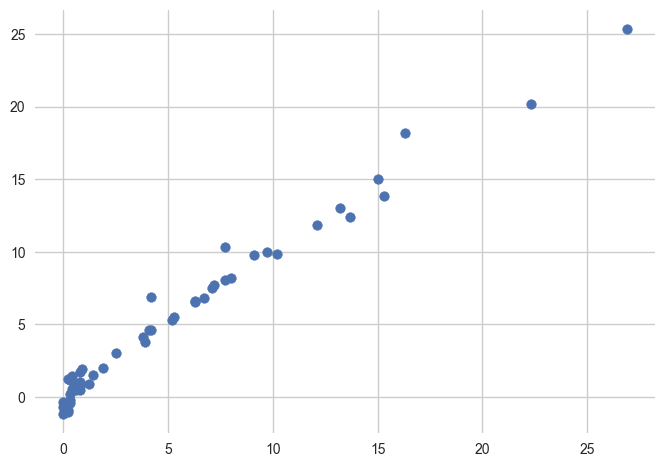

In [142]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)


R2 score: 0.9766228010748003
Mean absolute error: 0.6905345455834931


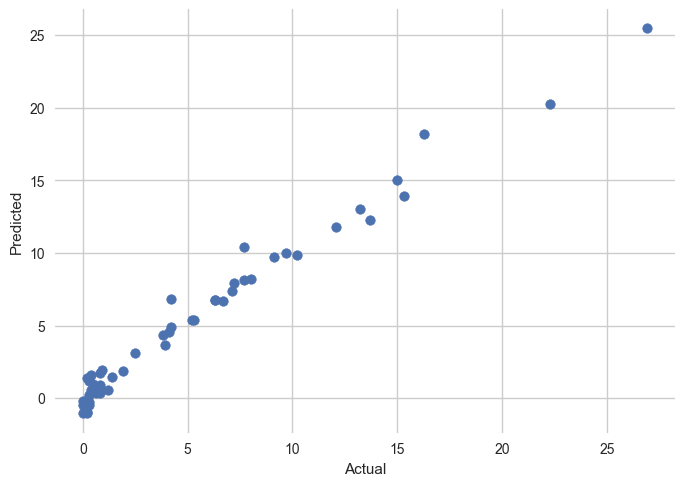

In [143]:
#ridge regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score,mean_absolute_error
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

R2 score: 0.9677330008807272
Mean absolute error: 0.8714379868451503


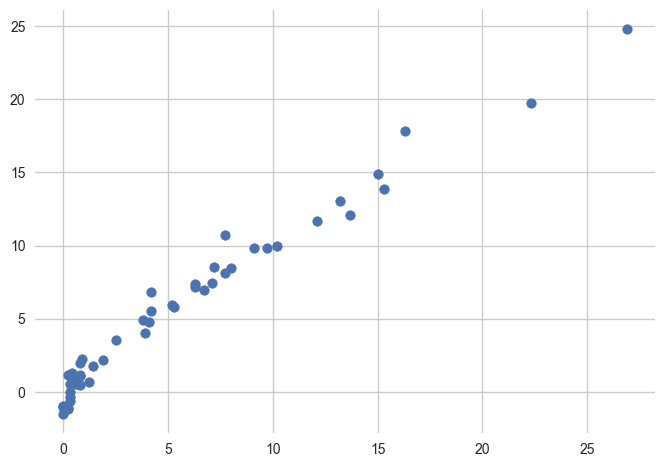

In [144]:
#cross validation Ridge
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)

R2 score: 0.8777177823187075
Mean absolute error: 1.7415526320622194


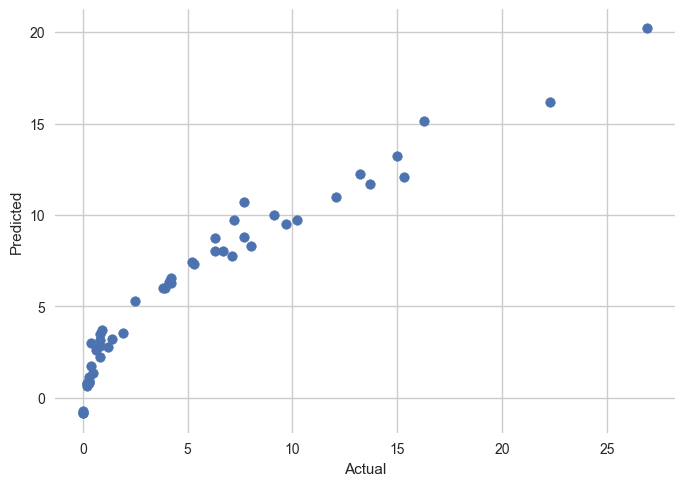

In [145]:
#elasticnet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error
elasticnet=ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred=elasticnet.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

R2 score: 0.9734769909970736
Mean absolute error: 0.7609068947918349


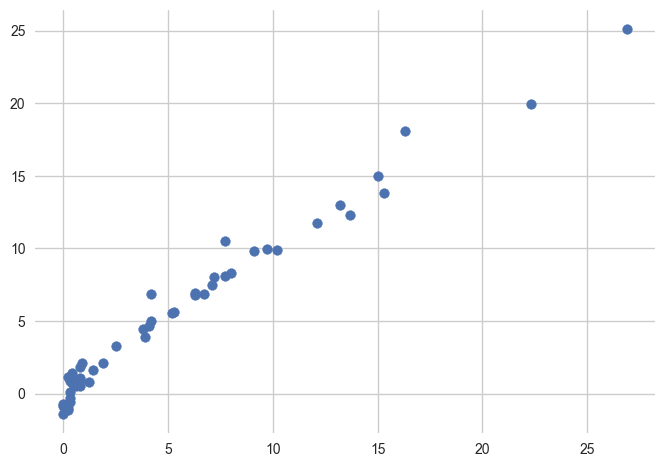

In [146]:
#cross validation elasticnet
from sklearn.linear_model import ElasticNetCV
elasticv=ElasticNetCV(cv=5)
elasticv.fit(X_train_scaled,y_train)
y_pred=elasticv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('R2 score:',score)
print('Mean absolute error:',mae)

Pickle the machine learning models,preprocessing model standardscaler

In [147]:
scaler

StandardScaler()

In [148]:
ridge

Ridge()

In [149]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))